# Axion-Photon mass estimation discovery limit
Notebook for generating Fig. 6 


In [ ]:
from numpy import *
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import AxionFuncs
import Like

gname = 'Photon'

# Number of mass points for data table 
nm = 50000 
m_vals = logspace(-4.0,1e0,nm)

# Energy range for binned data
E_max = 20.0 # Max energy (20 keV for photon, 10 keV for electron)
nE_bins = 700 # Number of bins (needs to be >100 to get good results)
E0 = 50.0e-3 # Range of energy resolutions for the plot
E_bins,R1_tab,R0 = AxionFuncs.BinnedPhotonNumberTable(m_vals,E0,E_max,nE_bins,coupling=gname,nfine=10,res_on=True) 


# Number of mass points for discovery limits
n_DL = 100
m_DL_vals = logspace(log10(1e-3),log10(2e-1),n_DL)

err_vals = [0.5,0.2,0.1,0.05,0.02,0.01]
nerr_vals = size(err_vals)

# Load data
dat = loadtxt("../my_data/MassEstimation_Photon.txt")
DL = dat[1:,:]
IAXO = Like.ConstantObsNumberLine(5.9,m_DL_vals,m_vals,R1_tab)


In [ ]:
# Only run this cell if one needs to overwrite the data (can take quite a while this one)
DL = zeros(shape=(nerr_vals,n_DL))

# Loop over energy resolutions
for i in range(0,nerr_vals):
    err = err_vals[i]

    # Generate discovery limits along mass values m_DL_vals
    if i==0:
        gmin = 1.0
    else:
        gmin = DL[i-1,:]
    DL[i,:] = Like.MassEstimationDiscoveryLimit(err,m_vals,R0,R1_tab,m_DL_vals,sigmas=2,gmin_vals=gmin,gmax=1e-9,ng=1000,nL=1000)
    
    print 'Finished:',i+1,'of',nerr_vals,': err = ',err,' %...'
print 'Done'

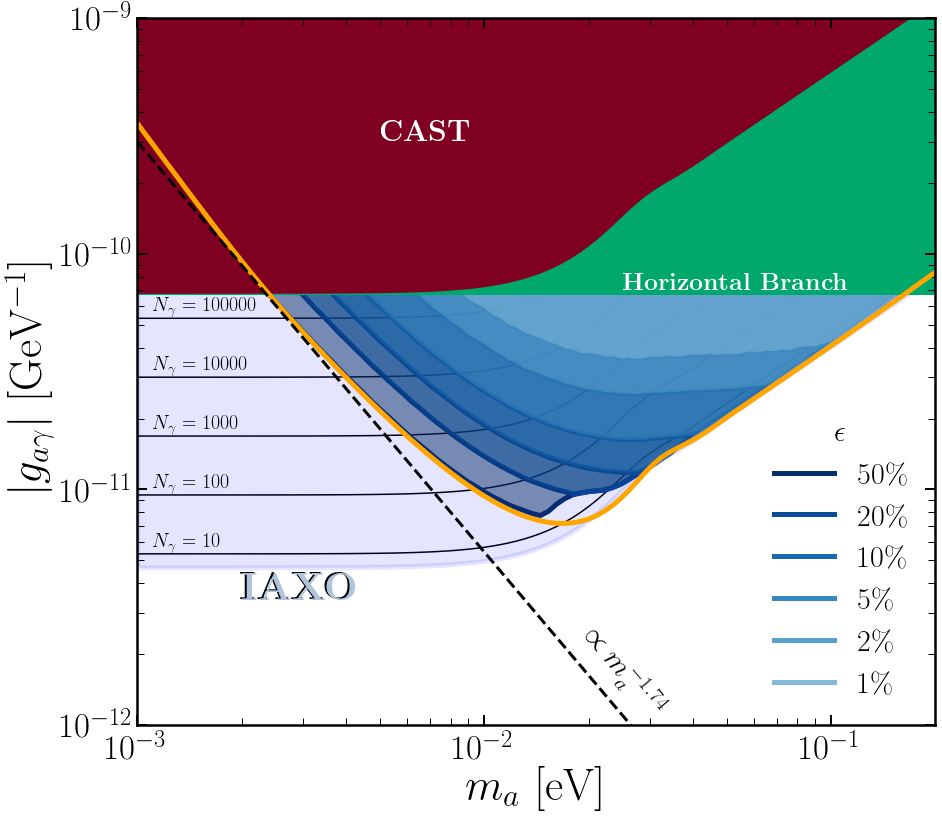

In [6]:
# Set various plotting style things
plt.rcParams['axes.linewidth'] = 2.5
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
fig = plt.figure(figsize=(14.3,13))
ax = fig.add_subplot(111)

# Limits for y-axis
ymin = 1e-12
ymax = 1e-9

# Plot IAXO limit
IAXO = Like.ConstantObsNumberLine(5.9,m_DL_vals,m_vals,R1_tab)
plt.fill_between(m_DL_vals,IAXO,y2=ymax,edgecolor="Blue",facecolor="Blue",alpha=0.1,linewidth=5)
plt.text(1.98e-3,3.44e-12,r"{\bf IAXO}",fontsize=40)
plt.text(2e-3,3.4e-12,r"{\bf IAXO}",color="lightsteelblue",fontsize=40)

# Plot constant event numbers lines
for Ngamma in [10,100,1000,10000,100000]:
    Nline = Like.ConstantObsNumberLine(Ngamma,m_DL_vals,m_vals,R1_tab)
    plt.loglog(m_DL_vals,Nline,'k-',zorder=0)
    plt.text(1.1e-3,Nline[0]*1.05,r'$N_\gamma$ = '+str(Ngamma),fontsize=20)

# Plot discovery limits for different resolutions
col = flipud(cm.Blues(linspace(0,1,10)))
for i in range(0,nerr_vals):
    plt.loglog(m_DL_vals,DL[i,:],linewidth=5,label=str(int(err_vals[i]*100))+'\%',color=col[i,:],zorder=0)
for i in (range(0,nerr_vals)):
    plt.fill_between(m_DL_vals,DL[i,:],y2=ymax,linewidth=5,facecolor=col[i,:],alpha=0.5)

DLM = Like.MassDiscoveryLimit_Simple(m_vals,R1_tab,R0,m_DL_vals)
plt.loglog(m_DL_vals,DLM,linewidth=5,color="Orange")

# HB limit
HB_col = [0.0, 0.66, 0.42]
HBmin = 6.7e-11
plt.fill_between([1e-3,1e0],[HBmin,HBmin],y2=ymax,edgecolor=None,facecolor=HB_col)
plt.text(2.5e-2,7e-11,r'{\bf Horizontal Branch}',fontsize=25,color='w')

# CAST limit
CAST_col = [0.5, 0.0, 0.13]
CAST = IAXO*14.5
plt.fill_between(m_DL_vals,CAST,y2=ymax,edgecolor=None,facecolor=CAST_col)
plt.text(5e-3,3e-10,r'{\bf CAST}',fontsize=30,color='w')

    
# Plot g \propto m^(-1.74) line
plt.plot(m_DL_vals,1.8e-15*m_DL_vals**-1.74,'k--',linewidth=3)
plt.text(1.8e-2,2.1e-12,r'$\propto m_a^{-1.74}$',fontsize=30,rotation=-50)


# Style
plt.xlim([m_DL_vals[0],m_DL_vals[-1]])
plt.ylim([ymin,ymax])
plt.xticks(fontsize=35)
plt.yticks(fontsize=35)
ax.tick_params(which='major',direction='in',width=2,length=10,right=True,top=True)
ax.tick_params(which='minor',direction='in',width=1,length=7,right=True,top=True)
ax.tick_params(axis='x', which='major', pad=10)
plt.xlabel(r"$m_a$ [eV]",fontsize=45)
plt.ylabel(r"$|g_{a\gamma}|$ [GeV$^{-1}$]",fontsize=45)

# Legend
leg = plt.legend(fontsize=30,frameon=False,title=r'$\epsilon$',loc="lower right")
plt.setp(leg.get_title(),fontsize=30)

# Show and save
plt.show()
fig.savefig('../plots/MassEstimation_Photon.pdf',bbox_inches='tight')
fig.savefig('../plots/plots_png/MassEstimation_Photon.png',bbox_inches='tight') # Save for preview in README

In [ ]:
# Save data 
savetxt("../my_data/MassEstimation_Photon.txt",vstack((m_DL_vals,DL)))